In [14]:
import shutil
import pandas as pd
import numpy as np
import os

In [15]:
# Define function to map day values to month
def map_month(day):
    year = (day - 1) // 365 + 1  # Calculate the year based on the day value
    day_within_year = (day - 1) % 365 + 1  # Calculate the day within the year

    # Define the days that each month ends on (in a non-leap year)
    month_end_days = [31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]

    # Identify the month based on the day_within_year
    for month, end_day in enumerate(month_end_days, start=1):
        if day_within_year <= end_day:
            return month


# Define function to map day values to year
def map_year(day):
    year = (day - 1) // 365 + 1
    return year

In [16]:
arr = []
for i in range(1, 3651):
    arr.append(i)

df = pd.DataFrame(arr)
df.columns = ["Day"]
df["Month"] = df["Day"].apply(map_month)
df["Year"] = df["Day"].apply(map_year)

In [17]:
df['Year'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [18]:
# Filter rows with months May, June, July, or August
July_df = df[(df["Month"].isin([5,6,7,8,9,10]))]

# Optionally, exclude specific years (e.g., 4 and 8) #testing: 3 & 6. Training: 0, 1, 2, 7,
July_df = July_df[ (July_df["Year"] == 7) ]  #| (July_df["Year"] == 3) | (July_df["Year"] == 8) (July_df["Year"] == 1) | (July_df["Year"] == 7)
# Reset the index
July_df = July_df.reset_index(drop=True)

# Display the resulting DataFrame
July_df


,Day,Month,Year
0,2311,5,7
1,2312,5,7
2,2313,5,7
3,2314,5,7
4,2315,5,7
...,...,...,...
179,2490,10,7
180,2491,10,7
181,2492,10,7
182,2493,10,7


In [31]:
normalized_data_path = "C:/Users/kharep/Downloads/Proprocessing_data/pressure_data/pressure_data/"
ROI_data_path = "C:/Users/kharep/Downloads/processed_image_data.csv"
new_July_Pressure_data = "C:/Users/kharep/Downloads/pressure_testing/year6/"
wind_data = "C:/Users/kharep/Downloads/Proprocessing_data/wind_data/wind_data/"

In [20]:
ROI_df = pd.read_csv(ROI_data_path)

In [21]:
ROI_df

,Day,Cluster,ConnectedComponent,CenterX,CenterY,x,y,Label
0,1001,13,2,63,48,62,47,COL
1,1001,13,2,63,48,63,47,COL
2,1001,13,2,63,48,64,47,COL
3,1001,13,2,63,48,65,47,COL
4,1001,13,2,63,48,66,47,COL
...,...,...,...,...,...,...,...,...
202814,99,3,2,93,20,88,25,CL
202815,99,3,2,93,20,89,25,CL
202816,99,3,2,93,20,90,25,CL
202817,99,3,2,93,20,91,25,CL


In [22]:
value_mapping = {
    'COL': 0,
    'COH': 1,
    'CL': 2,
    'NROI': -1,
    '-1.0': -1,
    
}

ROI_df["Month"] = ROI_df["Day"].apply(map_month)
ROI_df["Year"] = ROI_df["Day"].apply(map_year)
ROI_df['1802'] = ROI_df['Label'].map(value_mapping)

In [23]:
ROI_df[ROI_df["Year"] == 7]
# ROI_df['Year'].unique()

,Day,Cluster,ConnectedComponent,CenterX,CenterY,x,y,Label,Month,Year,1802
37809,2199,2,1,81,12,82,9,CL,1,7,2
37810,2199,2,1,81,12,83,9,CL,1,7,2
37811,2199,2,1,81,12,84,9,CL,1,7,2
37812,2199,2,1,81,12,85,9,CL,1,7,2
37813,2199,2,1,81,12,86,9,CL,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...
71418,2545,2,2,84,18,81,22,CL,12,7,2
71419,2545,2,2,84,18,82,22,CL,12,7,2
71420,2545,2,2,84,18,83,22,CL,12,7,2
71421,2545,2,2,84,18,84,22,CL,12,7,2


In [27]:
ROI_df = ROI_df[ROI_df['Label'] != '']

In [28]:
ROI_df['Label'].unique()

array(['COL', 'COH', 'CL', 'NROI'], dtype=object)

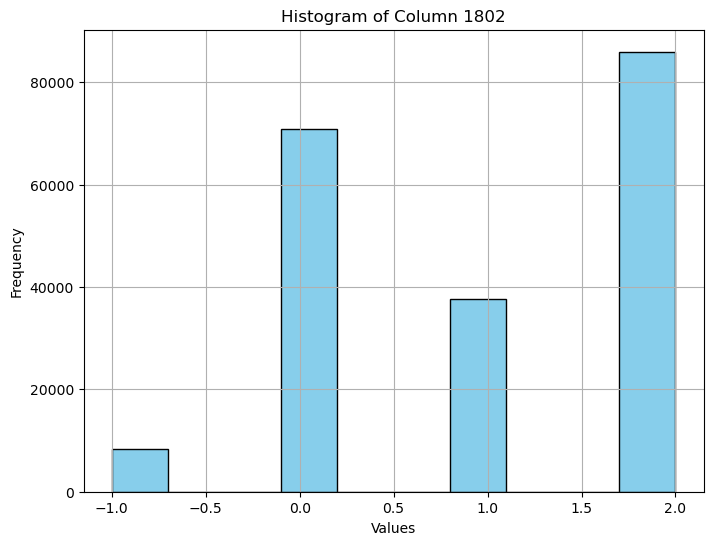

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(ROI_df['1802'], color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Column 1802')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [30]:
# Function to read a .txt file, convert it to a DataFrame, and flip the data
def read_txt_to_df(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    data = [list(map(int, line.split())) for line in lines]
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    
    # Flip the DataFrame vertically
    flipped_df = df.iloc[::-1].reset_index(drop=True)
    
    return flipped_df

def min_max_normalize(df):
    normalized_df = (df - df.min()) / (df.max() - df.min())
    return normalized_df

In [35]:
import pandas as pd
import numpy as np
from scipy.ndimage import binary_dilation

margin = 15
size = 15
starts = [[margin, margin], [margin+1, margin], [margin+2, margin], [margin, margin+1], [margin+1, margin+1], [margin+2, margin+1], [margin, margin+2], [margin+1, margin+2], [margin+2, margin+2]]
start_point = 0

def add_surrounding_points_without_overlap( x, y, radius, width, height, excluded_points, roi_points):
    kernel = np.zeros((2*radius+1, 2*radius+1), dtype=bool)
    y_center, x_center = radius, radius
    rr, cc = np.ogrid[:2*radius+1, :2*radius+1]
    dist = np.sqrt((rr - y_center)**2 + (cc - x_center)**2)
    kernel[dist <= radius] = True
    
    dilated = binary_dilation(kernel, structure=kernel)
    
    for dy, dx in zip(*np.where(dilated)):
        nx, ny = x + dx - radius, y + dy - radius
        if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in excluded_points and (nx, ny) not in roi_points:
            excluded_points.add((nx, ny))
            # coordination.add((nx, ny))

            

for i in range(2, July_df.shape[0]):
    df_arr = []
    day = July_df["Day"][i]
    pre_day = day - 1
    two_before = day - 2
    df_1 = min_max_normalize(read_txt_to_df(normalized_data_path + "day" + str(pre_day) + ".txt"))
    df_2 = min_max_normalize(read_txt_to_df(normalized_data_path + "day" + str(two_before) + ".txt"))
    df_3 = min_max_normalize(read_txt_to_df(wind_data + "day" + str(pre_day) + ".txt"))
    df_4 = min_max_normalize(read_txt_to_df(wind_data + "day" + str(two_before) + ".txt"))
    height = df_1.shape[0] - margin
    width = df_1.shape[1] - margin
    excluded_points = set()

    # Extract ROI data for the current day from ROI_df
    roi_data = ROI_df[ROI_df['Day'] == day]
    
    if not roi_data.empty:
        # coordination = set()
        # To store all ROI points
        # Collect all ROI points for the current day
        
        
        # Processing the pixels within each ROI
        for index, roi_row in roi_data.iterrows():
            x = roi_row['x']
            y = roi_row['y']
            label = roi_row['Label']
            excluded_points.add((x, y))
            # Sample points based on cluster size
            # cluster_size = len(roi_data)
            # sample_rate = 1 # if cluster_size <= 20 else 0.8 if cluster_size <= 40 else 0.6 if cluster_size <= 60 else 0.5
            # if (np.random.rand() <= sample_rate):
            
            # Check if the ROI is within the valid range
            if x >= margin and y >= margin and x < width and y < height:
                # Extract the region around the ROI
                rec_1 = df_1.iloc[max(0, y-size):min(df_1.shape[0], y+size), max(0, x-size):min(df_1.shape[1], x+size)]
                rec_2 = df_2.iloc[max(0, y-size):min(df_2.shape[0], y+size), max(0, x-size):min(df_2.shape[1], x+size)]
    
                rec_3 = df_3.iloc[max(0, y-size):min(df_3.shape[0], y+size), max(0, x-size):min(df_3.shape[1], x+size)]
                rec_4 = df_4.iloc[max(0, y-size):min(df_4.shape[0], y+size), max(0, x-size):min(df_4.shape[1], x+size)]
                        
                        
                # Flatten the regions and append to df_arr
                row_1 = rec_1.to_numpy().flatten()
                row_2 = rec_2.to_numpy().flatten()
                row_3 = rec_3.to_numpy().flatten()
                row_4 = rec_4.to_numpy().flatten()
                        
                row = np.append(row_3, row_4)
                row = np.append(row, row_2)
                row = np.append(row, row_1)
                        
                # Append x, y, and label to the row
                row = np.append(row, x)
                row = np.append(row, y)
                row = np.append(row, label)
                        
                df_arr.append(row)

                # add_surrounding_points_without_overlap( x, y, 3, width, height, excluded_points, roi_points)  # Add the point and surrounding points
        # Process the surrounding points
        # for coord in coordination:
        #     x, y = coord
        #     # Check if the point is within the valid range
        #     if x >= margin and y >= margin and x < width and y < height:
        #         rec_1 = df_1.iloc[max(0, y-size):min(df_1.shape[0], y+size), max(0, x-size):min(df_1.shape[1], x+size)]
        #         rec_2 = df_2.iloc[max(0, y-size):min(df_2.shape[0], y+size), max(0, x-size):min(df_2.shape[1], x+size)]

                
        #         # Flatten the regions and append to df_arr
        #         row_1 = rec_1.to_numpy().flatten()
        #         row_2 = rec_2.to_numpy().flatten()
        #         row = np.append(row_2, row_1)
                
        #         # Append x, y, and label to the row
        #         row = np.append(row, x)
        #         row = np.append(row, y)
                
        #         # Determine the surrounding label
        #         surrounding_label = str(label) + "_2" if label != "NROI" else -1
        #         row = np.append(row, surrounding_label)
                
        #         df_arr.append(row)
        #         excluded_points.add((x, y))
                
        # Processing the remaining pixels by skipping every 3 pixels

    for j in range(starts[start_point][0], height):
            for k in range(starts[start_point][1], width):
                if k >= margin and j >= margin and k < width and j < height:
                    if  ((k, j) not in excluded_points):
                    
                        rec_1 = df_1.iloc[max(0, j-size):min(df_1.shape[0], j+size), max(0, k-size):min(df_1.shape[1], k+size)]
                        rec_2 = df_2.iloc[max(0, j-size):min(df_2.shape[0], j+size), max(0, k-size):min(df_2.shape[1], k+size)]

                        rec_3 = df_3.iloc[max(0, j-size):min(df_3.shape[0], j+size), max(0, k-size):min(df_3.shape[1], k+size)]
                        rec_4 = df_4.iloc[max(0, j-size):min(df_4.shape[0], j+size), max(0, k-size):min(df_4.shape[1], k+size)]

                    
                    
                        # Flatten the regions and append to df_arr
                        row_1 = rec_1.to_numpy().flatten()
                        row_2 = rec_2.to_numpy().flatten()
                        row_3 = rec_3.to_numpy().flatten()
                        row_4 = rec_4.to_numpy().flatten()
                    
                        row = np.append(row_3, row_4)
                        row = np.append(row, row_2)
                        row = np.append(row, row_1)
                    
                        # Append x, y, and label to the row
                        row = np.append(row, k)
                        row = np.append(row, j)
                        row = np.append(row, -1)
                    
                        df_arr.append(row)
                    # coordination.add((k, j))
                    
    # else:
    #     # Day does not contain ROI, process all pixels
    #     for j in range(starts[start_point][0], height, 3):
    #         for k in range(starts[start_point][1], width, 3):
    #             rec_1 = df_1.iloc[max(0, j-size):min(df_1.shape[0], j+size), max(0, k-size):min(df_1.shape[1], k+size)]
    #             rec_2 = df_2.iloc[max(0, j-size):min(df_2.shape[0], j+size), max(0, k-size):min(df_2.shape[1], k+size)]
    #             rec_3 = df_3.iloc[max(0, y-size):min(df_3.shape[0], y+size), max(0, x-size):min(df_3.shape[1], x+size)]
    #             rec_4 = df_4.iloc[max(0, y-size):min(df_4.shape[0], y+size), max(0, x-size):min(df_4.shape[1], x+size)]
                    
                    
    #             # Flatten the regions and append to df_arr
    #             row_1 = rec_1.to_numpy().flatten()
    #             row_2 = rec_2.to_numpy().flatten()
    #             row_3 = rec_3.to_numpy().flatten()
    #             row_4 = rec_4.to_numpy().flatten()
                  
    #             row = np.append(row_3, row_4)
    #             row = np.append(row, row_2)
    #             row = np.append(row, row_1)
                    
    #             # Append x, y, and label to the row
    #             row = np.append(row, k)
    #             row = np.append(row, j)
    #             row = np.append(row, -1)
                
    #             df_arr.append(row)
                
    #     if start_point >= len(starts) - 1:
    #         start_point = 0
    #     else:
    #         start_point += 1

    # Convert and save the DataFrame
    dataframe = pd.DataFrame(df_arr)
    dataframe.to_csv(new_July_Pressure_data + "/day" + str(day) + ".csv", index=False)
                    

### import pandas as pd
import numpy as np
from scipy.ndimage import binary_dilation
import cv2


def add_surrounding_points_without_overlap(coordination, x, y, radius, width, height, excluded_points, roi_points):
    kernel = np.zeros((2*radius+1, 2*radius+1), dtype=bool)
    y_center, x_center = radius, radius
    rr, cc = np.ogrid[:2*radius+1, :2*radius+1]
    dist = np.sqrt((rr - y_center)**2 + (cc - x_center)**2)
    kernel[dist <= radius] = True
    
    dilated = binary_dilation(kernel, structure=kernel)
    
    for dy, dx in zip(*np.where(dilated)):
        nx, ny = x + dx - radius, y + dy - radius
        if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in excluded_points and (nx, ny) not in roi_points:
            excluded_points.add((nx, ny))
            coordination.add((nx, ny))

           


# Initialize variables
margin = 15
size = 15
starts = [[margin, margin], [margin+1, margin], [margin+2, margin], [margin, margin+1], [margin+1, margin+1], [margin+2, margin+1], [margin, margin+2], [margin+1, margin+2], [margin+2, margin+2]]
start_point = 0


# Process each day
for i in range(2, July_df.shape[0]):  # Adjust the range as needed
    df_arr = []
    day = July_df["Day"][i]
    pre_day = day - 1
    two_before = day - 2
    df_1 = cv2.imread(normalized_data_path + "day" + str(pre_day) + "/" + "day" + str(pre_day) + ".png", cv2.IMREAD_GRAYSCALE)
    df_2 = cv2.imread(normalized_data_path + "day" + str(two_before) + "/" + "day" + str(two_before) + ".png", cv2.IMREAD_GRAYSCALE)
    height = df_1.shape[0] - margin
    width = df_1.shape[1] - margin
    
    # Extract ROI data for the current day from ROI_df
    roi_data = ROI_df[ROI_df['Day'] == day]
    
    if not roi_data.empty:
        coordination = set()
        excluded_points = set()
        roi_points = set()  # To store all ROI points

        # Collect all ROI points for the current day
        for index, roi_row in roi_data.iterrows():
            x = roi_row['x']
            y = roi_row['y']
            roi_points.add((x, y))
        
        # Process the pixels within each ROI
        for index, roi_row in roi_data.iterrows():
            x = roi_row['x']
            y = roi_row['y']
            excluded_points.add((x, y))
            label = roi_row['Label']
            
            # Sample points based on cluster size
            cluster_size = len(roi_data)
            sample_rate = 1.0 #if cluster_size <= 20 else 0.8 if cluster_size <= 40 else 0.6 if cluster_size <= 60 else 0.5
            if np.random.rand() <= sample_rate:
                # Check if the ROI is within the valid range
                if x >= margin and y >= margin and x < width and y < height:
                    # Extract the region around the ROI
                    rec_1 = df_1[max(0, y-size):min(df_1.shape[0], y+size), max(0, x-size):min(df_1.shape[1], x+size)]
                    rec_2 = df_2[max(0, y-size):min(df_2.shape[0], y+size), max(0, x-size):min(df_2.shape[1], x+size)]
                    
                    rec_1 = cv2.normalize(rec_1, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                    rec_2 = cv2.normalize(rec_2, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                    
                    # Flatten the regions and append to df_arr
                    row_1 = np.array(rec_1).flatten()
                    row_2 = np.array(rec_2).flatten()
                    row = np.append(row_2, row_1)
                    
                    # Append x, y, and label to the row
                    row = np.append(row, x)
                    row = np.append(row, y)
                    row = np.append(row, label)
                    
                    df_arr.append(row)
                    # excluded_points.add((x, y))
                    add_surrounding_points_without_overlap(coordination, x, y, 3, width, height, excluded_points, roi_points)  # Add the point and surrounding points
                    
        # Process the surrounding points
        for coord in coordination:
            x, y = coord
            # Check if the point is within the valid range
            if x >= margin and y >= margin and x < width and y < height:
                rec_1 = df_1[max(0, y-size):min(df_1.shape[0], y+size), max(0, x-size):min(df_1.shape[1], x+size)]
                rec_2 = df_2[max(0, y-size):min(df_2.shape[0], y+size), max(0, x-size):min(df_2.shape[1], x+size)]

                rec_1 = cv2.normalize(rec_1, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                rec_2 = cv2.normalize(rec_2, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                
                # Flatten the regions and append to df_arr
                row_1 = np.array(rec_1).flatten()
                row_2 = np.array(rec_2).flatten()
                row = np.append(row_2, row_1)
                
                # Append x, y, and label to the row
                row = np.append(row, x)
                row = np.append(row, y)
                
                # Determine the surrounding label
                surrounding_label = str(label) + "_2" if label != "NROI" else -1
                row = np.append(row, surrounding_label)
                
                df_arr.append(row)
                excluded_points.add((x, y))
                    
        # Process the remaining pixels
        for j in range(starts[start_point][0], height ,3):
            for k in range(starts[start_point][1], width, 3):
                if (k, j) not in excluded_points:
                    rec_1 = df_1[max(0, j-size):min(df_1.shape[0], j+size), max(0, k-size):min(df_1.shape[1], k+size)]
                    rec_2 = df_2[max(0, j-size):min(df_2.shape[0], j+size), max(0, k-size):min(df_2.shape[1], k+size)]

                    rec_1 = cv2.normalize(rec_1, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                    rec_2 = cv2.normalize(rec_2, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                            
                    row_1 = np.array(rec_1).flatten()
                    row_2 = np.array(rec_2).flatten()
                    row = np.append(row_2, row_1)
        
                    row = np.append(row, k)
                    row = np.append(row, j)
                    row = np.append(row, -1)
                    
                    df_arr.append(row)
                    excluded_points.add((k, j))
                    
    else:
        # Day does not contain ROI, process all pixels
        for j in range(starts[start_point][0], height, 3):
            for k in range(starts[start_point][1], width, 3):
                rec_1 = df_1[max(0, j-size):min(df_1.shape[0], j+size), max(0, k-size):min(df_1.shape[1], k+size)]
                rec_2 = df_2[max(0, j-size):min(df_2.shape[0], j+size), max(0, k-size):min(df_2.shape[1], k+size)]

                rec_1 = cv2.normalize(rec_1, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                rec_2 = cv2.normalize(rec_2, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                            
                row_1 = np.array(rec_1).flatten()
                row_2 = np.array(rec_2).flatten()
                row = np.append(row_2, row_1)

                row = np.append(row, k)
                row = np.append(row, j)
                row = np.append(row, -1)
                
                df_arr.append(row)
                
        if start_point >= len(starts) - 1:
            start_point = 0
        else:
            start_point += 1

    # Convert and save the DataFrame
    dataframe = pd.DataFrame(df_arr)
    dataframe.to_csv(new_July_Pressure_data + "/day" + str(day) + ".csv", index=False)



Unique classes and their counts:
1802
-1.0     3250
COL_2     180
COL        38
COH        18
Name: count, dtype: int64
Color mapping used:
Class: COH, Color: (22, 56, 88)
Class: COL, Color: (255, 0, 0)
Class: COL_2, Color: (22, 0, 88)
Class: -1.0, Color: (0, 0, 255)


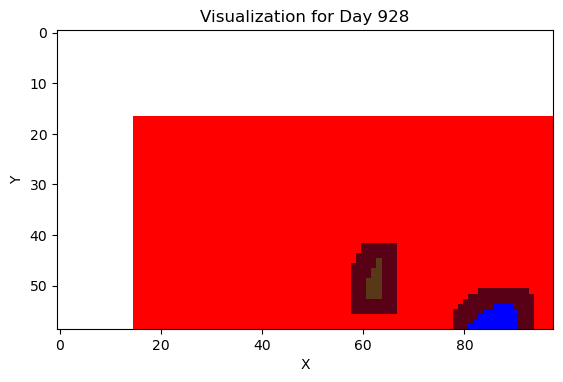

In [142]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the data for the specific day
day = 928  # Replace with the specific day you want to visualize
data = pd.read_csv(new_July_Pressure_data + f"/day{day}.csv", dtype={'1802': str})

# Extract the x, y coordinates and the class
x_coords = data.iloc[:, -3].astype(int)
y_coords = data.iloc[:, -2].astype(int)
classes = data.iloc[:, -1].astype(str)

# Print the unique classes and their counts
print("Unique classes and their counts:")
print(classes.value_counts())

# Determine the size of the image
height = int(y_coords.max() + 1)
width = int(x_coords.max() + 1)

# Create a white background image
image = np.ones((height, width, 3), dtype=np.uint8) * 255

# Map the classes to colors
color_mapping = {
    '-1.0': (0, 0, 255),  # Red for -1
    'COL': (255, 0, 0),  # Blue for COL
    'COH_2': (0, 255, 0),  # Green for COL_2
    'COH':(22,56,88),
    'COL_2' :(22,0,88),
}

# Debugging: Check if the classes are being correctly mapped to colors
print("Color mapping used:")
for cls in classes.unique():
    print(f"Class: {cls}, Color: {color_mapping.get(cls, 'Not Mapped')}")

# Color the pixels
for x, y, cls in zip(x_coords, y_coords, classes):
    if cls in color_mapping:
        image[y, x] = color_mapping[cls]
    else:
        print(f"Warning: Class '{cls}' not found in color mapping. Coordinates: ({x}, {y})")

# Convert the image from BGR to RGB for plotting with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image
plt.imshow(image_rgb)
plt.title(f"Visualization for Day {day}")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


Unique classes and their counts:
1802
-1.0    914
COL      37
Name: count, dtype: int64
Color mapping used:
Class: COL, Color: (255, 0, 0)
Class: -1.0, Color: (0, 0, 255)


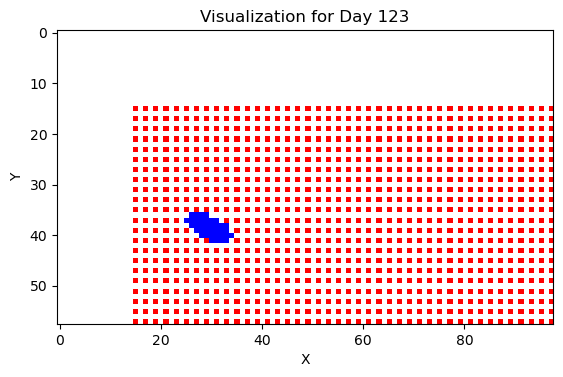

In [67]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the data for the specific day
day = 123  # Replace with the specific day you want to visualize
data = pd.read_csv(new_July_Pressure_data + f"/day{day}.csv", dtype={'1802': str})

# Extract the x, y coordinates and the class
x_coords = data.iloc[:, -3].astype(int)
y_coords = data.iloc[:, -2].astype(int)
classes = data.iloc[:, -1].astype(str)

# Print the unique classes and their counts
print("Unique classes and their counts:")
print(classes.value_counts())

# Determine the size of the image
height = int(y_coords.max() + 1)
width = int(x_coords.max() + 1)

# Create a white background image
image = np.ones((height, width, 3), dtype=np.uint8) * 255

# Map the classes to colors
color_mapping = {
    '-1.0': (0, 0, 255),  # Red for -1
    'COL': (255, 0, 0),  # Blue for COL
    'COL_2': (0, 255, 0)  # Green for COL_2
}

# Debugging: Check if the classes are being correctly mapped to colors
print("Color mapping used:")
for cls in classes.unique():
    print(f"Class: {cls}, Color: {color_mapping.get(cls, 'Not Mapped')}")

# Color the pixels
for x, y, cls in zip(x_coords, y_coords, classes):
    if cls in color_mapping:
        image[y, x] = color_mapping[cls]
    else:
        print(f"Warning: Class '{cls}' not found in color mapping. Coordinates: ({x}, {y})")

# Convert the image from BGR to RGB for plotting with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image
plt.imshow(image_rgb)
plt.title(f"Visualization for Day {day}")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
